# Cuaderno de Notas de Métodos Numéricos
## Solución de ecuaciones: método de punto fijo
### Prof. Jorge I. Zuluaga


#### Ejecutarme siempre

A continuación descargamos en el espacio virtual de este cuaderno todos los archivos necesarios para que las notas del curso funcionen bien:

In [ ]:
!git clone https://github.com/JorgeZuluaga/NotasMetodosNumericos
!ln -s NotasMetodosNumericos mn
!make -C mn pull

Cloning into 'NotasMetodosNumericos'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 108 (delta 46), reused 82 (delta 20), pack-reused 0
Receiving objects: 100% (108/108), 8.53 MiB | 19.32 MiB/s, done.
Resolving deltas: 100% (46/46), done.
make: Entering directory '/content/NotasMetodosNumericos'
git reset --hard HEAD
HEAD is now at 876de31 Commit
git pull origin master
From https://github.com/JorgeZuluaga/NotasMetodosNumericos
 * branch            master     -> FETCH_HEAD
Already up to date.
make: Leaving directory '/content/NotasMetodosNumericos'


## Un vistazo de la clase

  Qué veremos en esta clase:

  - Recordemos.
  - El método de punto fijo.
  - Implementación en Python.
  - Análisis del método.

  Para leer en el libro: sección 2.2 "Iteración de punto fijo".

## Recordemos

- Estamos resolviendo problemas del tipo:

  $$
  g(x) = h(x)
  $$
  que se puede formular, en términos de sus gráficos como *cuál es el valor de $x$ tal que la curva de $g(x)$ coincide con $h(x)$ (se intersectan)*.

- Estos problemas se pueden escribir en la forma:

  $$
  f(x)=0
  $$
  que se puede formular, en términos del gráfico de $f(x)$ como *cuál es el valor de $x$ tal que la curva de $f(x)$ corta el eje x (se hace cero)*.

  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/raices.png">

- Existen dos tipos de métodos numéricos para encontrar la solución a ecuaciones de una variable:

  - **Métodos acotados**: son métodos para los cuáles se debe conocer el íntervalo en el que se encuentra la raíz.  Es decir, como entradas, estos métodos necesitan un intervalo $[a,b]$ tal que $p\in[a,b]$.

  - **Métodos abiertos**: son métodos para los cuáles no se conoce el intervalo.  Es decir, como entrada, estos métodos solo necesitan el valor aproximado de la solución $p$.

## Iteración de punto fijo

- Otra manera de formular el problema de una ecuación de una variable, es escribir la ecuación en la forma:

  $$
  x = g(x)
  $$
  A este tipo de problemas lo llamamos **encontrar el punto fijo de la función $g(x)$**.  Graficamente el problema es como muestra la figura.

  <center>
  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/punto-fijo.png">
  </center>
  
- Dado un problema del tipo $f(x)=0$ nótese que las siguientes funciones tienen un punto fijo en la raíz $p$ de esta función
  
  $$
  g(x)=x-f(x), g(x)=x+3f(x), g(x) = x + f(x)^2
  $$

- Otra manera de encontrar la función $g(x)$ que tiene un punto fijo en una ecuación general de la forma $h(x)=g(x)$ es despejar x de alguna manera.  

  - **Ejemplo**: encontrar una $g(x)$ que tenga un punto fijo en la raíz de la función $f(x)=\sqrt x - \cos x$.
  
  - **Solución**: 
  
    - Las siguientes funciones tienen un punto fijo en la raíz de $f(x)$:

      $$
      g(x) = f(x)+x = \sqrt x - \cos x + x
      $$

      $$
      g(x) = x - f(x) = x - \sqrt x + \cos x
      $$

    - También las siguientes funciones g(x) lo tienen:

      - Partiendo de:

        $$
        \sqrt x - \cos x = 0
        $$
        despejemos $x$ de la raíz: 

        $$
        x = \cos^2 x
        $$
        de modo que $g(x)=\cos^2 x$.

      - Despejemos $x$ del coseno:

        $$
        x = \cos^{-1}(\sqrt x)
        $$ 
        de modo que $g(x)= \cos^{-1}(\sqrt x)$.

      - Si multiplicamos la ecuación original por $\sqrt x$ la ecuación queda:

        $$
        x = \sqrt x \cos x
        $$
        de modo que $g(x)=\sqrt x \cos x$.

- De todas las posibles $g(x)$ ¿cuál escoger?


### Teorema del punto fijo

1. Si $g \in C[a, b]$ y $g(x) \in[a, b]$ para todas $x \in[a, b]$, entonces $g$ tiene por lo menos un punto fijo en $[a, b]$.

2. Si, además, $g^{\prime}(x)$ existe en $(a, b)$ y hay una constante positiva $k<1$ con

  $$
  \left|g^{\prime}(x)\right| \leq k, \quad \text { para todas las } x \in(a, b)
  $$
  entonces, existe exactamente un punto fijo en $[a, b]$. (Véase la figura)

  <center>
  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/teorema-punto-fijo.png">
  </center>


- A continuación se pueden dar 3 situaciones:

  1. Que $p_1$ sea la raíz, es decir que $f(p_1)=0$ (muy improbable).

  2. Que la raíz quede entre $a_1$ y $p_1$, es decir que $f(a_1)$ y $f(p_1)$ tengan signos opuestos.  En ese caso se puede repetir el procedimiento definiendo un nuevo intervalo:

     $$
     a_2 = a_1, b_2 = p_1
     $$

  3. Que la raíz quede entre $p_1$ y $b_1$, es decir que $f(p_1)$ y $f(b_1)$ tengan signos opuestos.

  En ese caso se puede repetir el procedimiento definiendo un nuevo intervalo:

     $$
     a_2 = p_1, b_2 = b_1
     $$

- Una vez definido el nuevo intervalo, se calcula la nueva aproximación:

  $$
  p_2 =  \frac{a_2+b_2}{2}
  $$

- El procedimiento anterior se repite hasta que se cumpla una condición de parada.

#### Error y criterio de parada

- En cada paso el error obtenido en la nueva aproximación se puede estimar como:

  1. **Error por intervalo**: como sabemos que la raíz está sin duda alguna en el intervalo, la mitad tamaño del intervalo en el que se busca es un buen estimativo del error, $p^* = p_n \pm (b_n-a_n)/2$.

  2. **Error por aproximaciones sucesivas**: otro intervalo que se puede considerar contiene la raíz es el intervalo definido por dos raíces consecutivas, es decir $p^* = p_n \pm |p_{n}-p_{n-1}|/2$.

- El procedimiento se repite hasta que en el paso $n$ se produzca cualquiera de las siguientes condiciones:

  1. Se encuentre la raíz, es decir $f(p_n)=0$.
  2. El íntervalo de búsqueda sea muy pequeño $(b_n-a_n)/2<TOL$, donde $TOL$ es una tolerancia.
  3. El íntervalo definido por raíces sucesivas es muy pequeño $(b_n-p_{n-1})/2<TOL$.
  4. Se han realizado $N_0$ pasos.

#### Algoritmo

- Un algoritmos del método de bisección se muestra en la figura abajo:

<center><img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/algoritmo-biseccion.png" width=600></center>

  ¿Cuál es la traducción de este algorítmo a `Python`?

#### Rutina de bisección en Python

- A continuación proveemos la traducción literal del algoritmo de bisección:

In [ ]:
def biseccion_burden(f,a,b,TOL,N0):
  #Paso 1
  i=1
  FA=f(a)
  #Paso 2
  while i<=N0:
    #Paso 3
    p = a + (b-a)/2
    FP = f(p)
    #Paso 4
    if FP == 0 or (b-a)/2 < TOL:
      return p
    #Paso 5
    i = i + 1
    #Paso 6
    if FA*FP>0:
      a = p
      FA = FP
    else:
      b = p
  print(f"El método fracasó después de {N0} iteraciones")


- **Ejemplo 1**: Muestreque $f(x)=x^3 +4 x^2 −10$ tiene una raíz en $[1,2]$ y utilice el método de bisección para determinar una aproximación para la raíz que sea precisa por lo menos dentro de $10^{–4}$.

  - **Solución**.

    - Para saber si tiene una raíz debemos evaluar la función en los extremos del intervalo $[1,2]$, así $f(1) = -5$ y $f(2) = 14$. 

    - Como los signos cambian sabemos que la función efectivamente tiene una raíz. 

    - Para encontrar la raíz usamos el algoritmo de bisección implementado en Python:

In [ ]:
biseccion_burden(lambda x:x**3+4*x**2-10,1,2,1e-4,100)

1.36517333984375

- Se puede mejorar el algoritmo usando una tolerancia relativa, una condición que evalúe desde el principio si el método funcionará o no y entradas opcionales:

In [ ]:
def biseccion_alternativo(f,a,b,TOL=1e-7,N0=100):
  #Evalua si el método funcionará o no
  if f(a)*f(b)>0:
    print(f"La función no tiene un cero en el intervalo [{a},{b}]")
    return 0
  #Comienza el método
  i=1
  FA=f(a)
  #Usamos la formula de error relativo |p-p*|/|p*|
  while ((b-a)/2)/max(abs(a),abs(b))>=TOL:
    p = a + (b-a)/2
    FP = f(p)
    i = i + 1
    if i>N0:
      print(f"El método fracasó después de {N0} iteraciones")
      break
    if FA*FP>0:
      a = p
      FA = FP
    else:
      b = p
  #Devolvemos el valor obtenido hasta ahora
  return p

- Apliquemoslo al caso ya estudiado:

In [ ]:
biseccion_alternativo(lambda x:x**3+4*x**2-10,1,2)

1.365229845046997

In [ ]:
biseccion_alternativo(lambda x:x**3+4*x**2-10,1,2,TOL=1e-4)

1.364990234375

In [ ]:
biseccion_alternativo(lambda x:x**3+4*x**2-10,1,2,TOL=1e-4,N0=20)

1.364990234375

In [ ]:
biseccion_alternativo(lambda x:x**3+4*x**2-10,1,2,N0=20)

El método fracasó después de 20 iteraciones


1.365229606628418

- Nótese que como el parámetro `N0` es ahora opcional no hay necesidad de pasarlo a la rutina.

- Otro algoritmo alternativo usa listas y puede devolver más información que simplemente la raíz:

In [ ]:
import numpy as np
def biseccion_listas(f,a,b,TOL=1e-7,N0=100):
  #Evalua si el método funcionará o no
  if f(a)*f(b)>0:
    print(f"La función no tiene un cero en el intervalo [{a},{b}]")
    return [],[],[],[]

  #Listas 
  an=np.zeros(N0)
  bn=np.zeros(N0)
  pn=np.zeros(N0)
  en=np.zeros(N0)

  #Valores iniciales
  an[0]=a
  bn[0]=b
  pn[0]=(a+b)/2
  en[0]=((b-a)/2)/max(abs(a),abs(b))

  #Comienza el método
  i=0
  FA=f(an[0])
  while en[i]>=TOL:
    
    i = i + 1
    if i>N0:
      print(f"El método fracasó después de {N0} iteraciones")
      break
    
    #Algoritmo
    pn[i] = an[i-1] + (bn[i-1]-an[i-1])/2
    FP = f(pn[i])
    if FA*FP>0:
      an[i] = pn[i]
      bn[i] = bn[i-1]
      FA = FP
    else:
      an[i] = an[i-1]
      bn[i] = pn[i]

    #Error
    en[i] += [((bn[i]-an[i])/2)/max(abs(an[i]),abs(bn[i]))]
    
  #Devolvemos el valor obtenido hasta ahora
  return an[0:i+1],bn[0:i+1],pn[0:i+1],en[0:i+1]

- Lo aplicamos al caso anterior:

In [ ]:
an,bn,pn,en=biseccion_listas(lambda x:x**3+4*x**2-10,1,2,TOL=1e-2)

In [ ]:
en

array([0.25      , 0.16666667, 0.08333333, 0.04545455, 0.02272727,
       0.01136364, 0.00568182])

- Ahora esta rutina produce listas de los valores de $p_n$ que el algoritmo fue encontrando en el camino:

In [ ]:
pn

array([1.5     , 1.5     , 1.25    , 1.375   , 1.3125  , 1.34375 ,
       1.359375])

- Usando estas listas podemos hacer cosas interesantes, tales como graficar el proceso de aproximación:

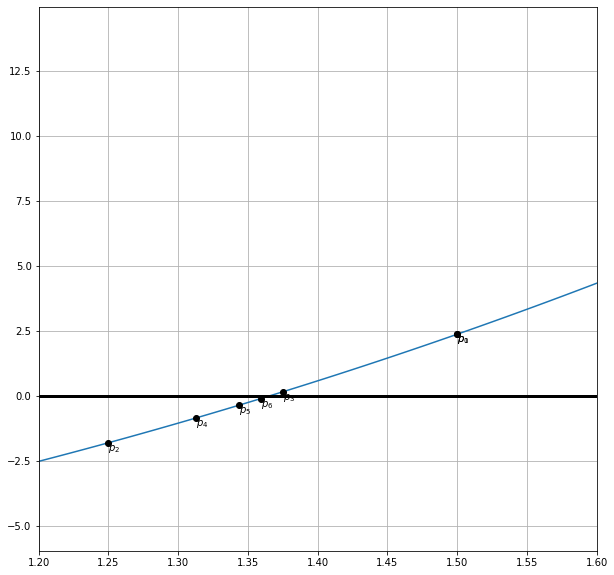

In [ ]:
import matplotlib.pyplot as plt
f=lambda x:x**3+4*x**2-10
x=np.linspace(1,2,100)
fx=f(x)

#Gráfico de la función
plt.figure(figsize=(10,10))
plt.plot(x,fx)
#Gráfico de puntos que encontro en el camino
plt.plot(pn,f(pn),color='k',marker='o',linewidth=0)
#Marquemos los puntos
for i in range(len(pn)):
  plt.text(pn[i],f(pn[i]),rf"$p_{i}$",va='top')

#Decoración
plt.axhline(0,color='k',linewidth=3)
plt.xlim(1.2,1.6)
plt.grid()


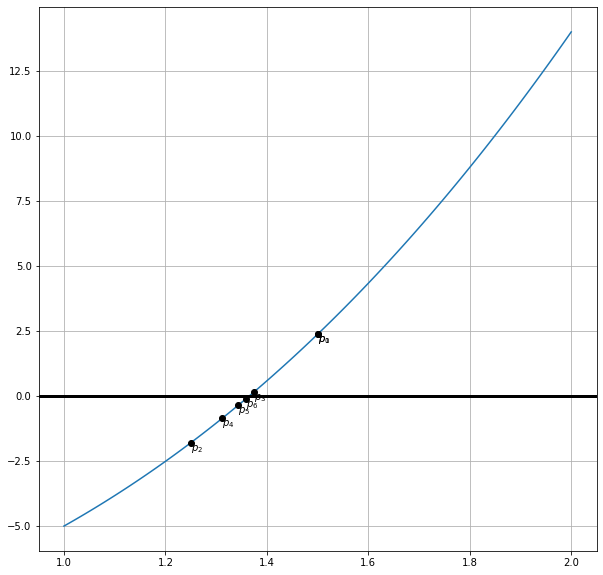

In [ ]:
import matplotlib.pyplot as plt
f=lambda x:x**3+4*x**2-10
x=np.linspace(1,2,100)
fx=f(x)

#Gráfico de la función
plt.figure(figsize=(10,10))
plt.plot(x,fx)
#Gráfico de puntos que encontro en el camino
plt.plot(pn,f(pn),color='k',marker='o',linewidth=0)
#Marquemos los puntos
for i in range(len(pn)):
  plt.text(pn[i],f(pn[i]),rf"$p_{i}$",va='top')

#Decoración
plt.axhline(0,color='k',linewidth=3)
plt.grid()

- O graficar los errores:

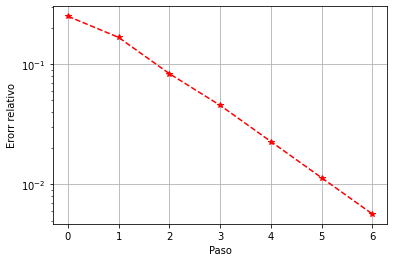

In [ ]:
#Gráfico semilogarítmico
plt.semilogy(en,color='r',marker='*',linestyle='--')

#Decoración
plt.xlabel("Paso")
plt.ylabel("Erorr relativo")
plt.grid()

#### Aplicando el método de bisección a un caso real

- Podemos aplicar nuestras rutinas al caso real que vimos al principio de la unidad, para resolver la ecuación:

  $$
  D \tan \theta-\frac{1}{2} g \frac{D^{2}}{v^{2} \cos ^{2} \theta}+h-H=0
  $$

- Como la función ahora no es tan fácil de escribir usando la estructura `lambda`, usamos una nueva herramienta y es el `def` no para crear algorítmos, sino funciones:

In [ ]:
def funcion_angulo_basket(teta):
  #Valor de los parametros fisicos
  H=3.05
  h=2.0
  D=10
  v=12
  g=9.8

  fteta=D*np.tan(teta)-0.5*g*D**2/(v**2*np.cos(teta)**2)+h-H
  return fteta

- A esta función se le pasa un valor de `teta` y ella devuelve el valor de la función:

In [ ]:
funcion_angulo_basket(0.2)

-2.565502184239694

- Para usar el método de bisección necesitamos ahora encontrar el intervalo de búsqueda.  Nos podemos apoyar de una gráfica:

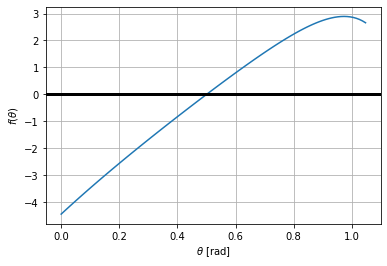

In [ ]:
#Listas
teta=np.linspace(0,np.pi/3,100)
fteta=funcion_angulo_basket(teta)

#Gráfico
plt.plot(teta,fteta)
#Una línea horizontal negra para ver mejor el eje x
plt.axhline(0,color='k',linewidth=3)

#Decoración
plt.xlabel(r"$\theta$ [rad]")
plt.ylabel(r"$f(\theta)$")
plt.grid()

- Vemos que la raíz está en el intervalo $[0,0.6]$ y así podemos llamar al algoritmo de bisección:

In [ ]:
teta_lanzamiento=biseccion_alternativo(funcion_angulo_basket,0,0.6,TOL=1e-10)
print(f"El ángulo de lanzamiento debe ser {teta_lanzamiento} rad = {teta_lanzamiento*180/np.pi} grados")

El ángulo de lanzamiento debe ser 0.5006497788475823 rad = 28.6851193421245 grados


#### Análisis del método de bisección

- ¿Cuál es el error del método de bisección en el paso $n$?. Esta es una pregunta que vamos a hacer siempre que trabajemos con métodos numéricos.  En algunos casos es posible responder, en otros no.

- En el caso del método de bisección es posible hacerlo.

- El error en la primera aproximación es a lo sumo igual al tamaño del semi intervalo:

  $$
  |p_1-p|<\frac{b-a}{2}
  $$

- En la segunda aproximación, como el intervalo se redujo a menos de la mitad del anterior el error será:

  $$
  |p_2-p|<\frac{1}{2}\left(\frac{b-a}{2}\right)
  $$

- Generalizando, en el paso $n$ el error será:

  $$
  |p_n-p|<\frac{b-a}{2^n}
  $$

- Es decir, la cota superior para el error absoluto en el método de bisección en el paso $n$ es:

  $$
  |p_n-p|<M_n
  $$
  donde

  $$
  M_n=\frac{b-a}{2^n}
  $$

#### Una aplicación del análisis del método de bisección

- Un ejemplo del uso de la fórmula de la cota de error del método de bisección la podemos hacer con el problema teórico que resolvimos antes, es decir, el de encontrar la raíz de la ecuación $f(x)=x^3 +4 x^2 −10$ que está en el intervalo $[1,2]$.

- De acuerdo al algoritmos que habíamos usado, el número de pasos para obtener la solución con una tolerancia de $10^{-4}$ fue de 13 pasos.  La cota máxima para el error es:

  $$
  M_{13}=\frac{b-a}{2^{13}}=\frac{2-1}{2^{13}}=0.00012 = 1.2\times 10^{-4}
  $$

- Pero esta es una cota del error absoluto.  El error relativo será eso dividido el valor real de la raíz que nos dio aproximadamente 1.365.  Así que el error relativo será:

  $$
  E_r<\frac{1.2\times 10^{-4}}{1.365}=0.89\times 10^{-5}
  $$
  que casi coincide con nuestra tolerancia $10^{-4}$.

- Podemos usar la fórmula de la cota superior para reponder a la pregunta ¿cuántos pasos se necesitan para obtener la raíz con un error absoluto de $10^{-12}$?.  Para ello hacemos $M_n=10^{-12}:

  $$
  10^{-12}=\frac{b-a}{2^{n}}
  $$
  como $a=1$ y $b=2$ entonces:

  $$
  10^{-12}=\frac{2-1}{2^{n}}
  $$
  o bien

  $$
  10^{-12}=2^{-n}
  $$

- Podemos despejar $n$ usando el logaritmo, así:

  $$
  \log 10^{-12}=\log 2^{-n}
  $$

  $$
  -12\log 10=-n\log 2
  $$

  $$
  n=12\log 10/\log 2=39.89
  $$
  es decir, se necesitan como mínimo 40 pasos para alcanzar esa precisión.

- Pongamos a prueba esta predicción con nuestra rutina que usa listas:

In [ ]:
an,bn,pn,en=biseccion_listas(lambda x:x**3+4*x**2-10,1,2,TOL=1e-12)
print(f"Número de pasos {len(pn)}")

Número de pasos 40


- Que coincide con nuestra predicción

## Continuará...

## Ejercicios

- Partiendo del resultado obtenido en clase para el ángulo y la ecuación:

   $$
   H=v \sin \theta T-\frac{g T^{2}}{2}+h
   $$

   encuentre el valor del tiempo $T$ que se demora la bola en volar desde las manos del tirador hasta el aro usando el método de bisección.  Haga una rutina que devuelva el valor de $d_n=|p_{n}-p_{n-1}|$ y haga un un gráfico de $d_n$ y de $M_n$. 

   **Ayuda**: para hacer un grafico de $M_n$ hasta $n=9$ se puede usar (después de haber escogido apropiadamente los valores de $a$ y $b$):

   ```python
   n=np.arange(0,10)
   Mn=(b-a)/2**n
   plt.plot(n,Mn)
   ```

-----
*Fin*